## Numerical integration:

- Choose a function on a closed interval (the function *cannot* be a low order polynomial, but need not be too complicated). 
Choose a function that you can calculate the integral for analytically.


- Implement *two different* numerical integration methods, one with fixed interval sizes, one with Gaussian quadrature, 
to integrate this function. These don't need to be of very high order. 
You should write your code such that you can change the number of sub-intervals (and number of evaluation points).


- Compare the difference between the two numerical integrals, and their difference with the correct/analytic answer, as a function of the number sub-intervals. 
Is the difference between the two estimates a good indicator of the actual error?

## My function of choice: $ f(x) = xsin(x)$ 
 - Derivative: $ f'(x) = sin(x) + xcos(x) $
 
 - Integral: $\int \mathrm{xsin(x)} \mathrm{d}x$ = $ sin(x) - xcos(x) $
 


 # Methods:
 
 - Midpoint rule
 - Gaussian Quadrature

In [86]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import legendre
from numpy.polynomial.legendre import legroots as leg
from scipy.special import roots_legendre as rootleg

# Our function to be integrated, takes a value
def Function(value):
    return(value*np.sin(value))


# rule that numerically integrates according: takes a val, a lower bound and upper bound to be intgrated 
def Midpoint(step, low, high):
    
    value1 = []
    value2 = 0
    width  = (high-low)/step  
     
    for n in range (1,step+1):                      #to offset the initial value 0 which python counts from.
        sub_int_mid = low + (n-1/2)*width           #Midpoint of each subinterval
        value1.append(Function(sub_int_mid))
    value2          = width*np.sum(value1)          #approximated area
    return(value2)

#Implementation of trapazoidal rule
def Trap(step, low, high):
    width = (high-low)/step
    value = [Function(low)]
    
    for i in range(1,step):
        value.append(2*Function(low + i*width))
    value.append(Function(high))
    return(0.5*width*np.sum(value))

#Implementation of Gaussian quadrature on arbitrary intervals
def Gauss(step, low, high):
    width  = 0.5*(low + high)
    roots  = rootleg(step)[0]
    weights = rootleg(step)[1]
    value  = []
    
    for i in range(len(roots)):
        t = roots[i]
        legen = 0.5*(high-low)*weights[i]*Function(0.5*(low + high) + 0.5*(high-low)*t)
        value.append(legen)
    return(np.sum(value)) 

#Calculates the relative error of the different rules (fun)
def Relative_Error(fun, step, low, high):
    integral_high   = np.sin(high)-high*np.cos(high)
    integral_low    = np.sin(low)-low*np.cos(low)
    integral        = integral_high - integral_low
    return(abs(integral-fun(step,low,high))/integral)*100

def Plot(f, step, low, high):
    
    X_Values  = []
    Y_Values  = []
    Rel_Error = []
    
    
    for i in range(1,step+1):
        a   = f(i,low,high)
        err = Relative_Error(f, i, low, high)
        X_Values.append(i)
        Y_Values.append(a)
        Rel_Error.append(err)
    

    fig   = plt.figure()
    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.50, 0.25, 0.40, 0.35],facecolor='y') # inset axes
    axes1.plot(X_Values, Y_Values,'go--')
    axes2.plot(X_Values, Rel_Error,'b')
    axes1.set_title("Value Vs Steps")
    axes2.set_title("Error Vs Steps")
    axes1.set_xlabel('# Of Sub-Interval')
    axes2.set_xlabel('# Of Sub-Interval')
    axes1.set_ylabel('Value')
    axes2.set_ylabel('Value')
    plt.show()

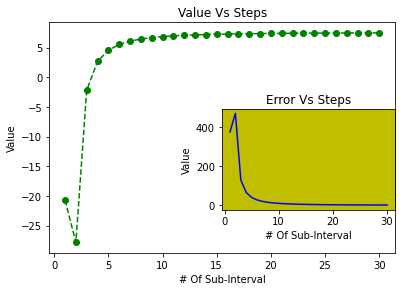

In [87]:
Plot(Trap,30,1,10)

In [11]:
print("The value of of the integral using the trap method is: " + str(Trap(50,2,7)))
print("The relative error of the trap method is: "+ str(Relative_Error(Trap,50,2,7)))
print('\n')

print("The value of of the integral using the midpoint method is: " + str(Midpoint(50,2,7)))
print("The relative error of the midpoint method is: " + str(Relative_Error(Midpoint,50,2,7)))
print('\n')

print("The value of of the integral using the Gauss method is: " + str(Gauss(50,2,7)))
print("The relative error of the midpoint Gauss is: " + str(Relative_Error(Gauss,50,2,7)))

The value of of the integral using the trap method is: -6.357038455828771
The relative error of the trap method is: -0.07673509820067714


The value of of the integral using the midpoint method is: -6.364361473352504
The relative error of the midpoint method is: -0.038371932374775757


The value of of the integral using the Gauss method is: -6.361920281604386
The relative error of the midpoint Gauss is: -1.2006334677766333e-12


## Discussion:

It's clear that in the large limit, they all tend to to be equally as valid, meaning, they are well within a percent of the 
answer compared to the "analyticaly" computed counterpart. The quadrature method is the best of the three.
However, depending on the area of integration and the relative subintervals used, the differences will be noticle to within a few percent. Thus all the methods have their drawbacks depending on the accuracy and effiency one required. For example:

The value of of the integral using the trap method is: -5.866213797219915
The relative error of the trap method is: -7.791774534140972


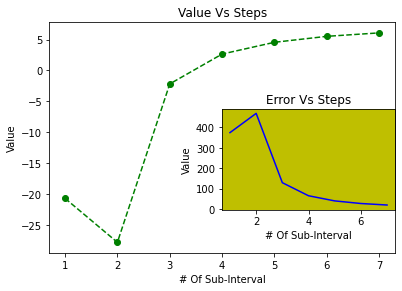



The value of of the integral using the midpoint method is: -6.61263833421307
The relative error of the midpoint method is: -3.9409178598751065


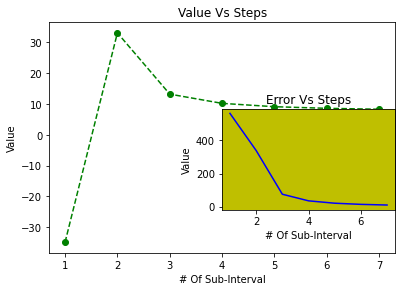



The value of of the integral using the Gauss method is: -6.361959971118862
The relative error of the midpoint Gauss is: -0.0006238606080603558


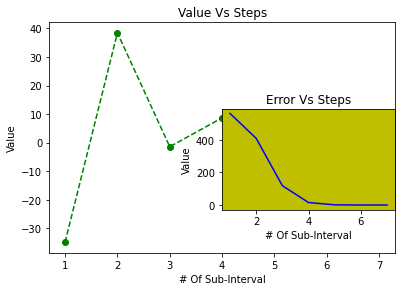

In [88]:
print("The value of of the integral using the trap method is: " + str(Trap(5,2,7)))
print("The relative error of the trap method is: "+ str(Relative_Error(Trap,5,2,7))) 
Plot(Trap,7,1,10)
print('\n')

print("The value of of the integral using the midpoint method is: " + str(Midpoint(5,2,7)))
print("The relative error of the midpoint method is: " + str(Relative_Error(Midpoint,5,2,7)))
Plot(Midpoint,7,1,10)
print('\n')

print("The value of of the integral using the Gauss method is: " + str(Gauss(5,2,7)))
print("The relative error of the midpoint Gauss is: " + str(Relative_Error(Gauss,5,2,7)))
Plot(Gauss,7,1,10)


Thus, if one requires a solution to within a few percent, the Gauss method is computational more demanding. This is rather apparent given what is required: special legendre functions and weights - roots to those function. Whereas, the trapezoidal simply requires the integrand and a decent amount of sub-interval for a given region that is to be integrated (See figures below). In either case, the quadrature method will give you an answer that's most acurate granted one takes the appropriate amount of polynomial degree for a given decimal requirement. 

The Trapezoidal Method


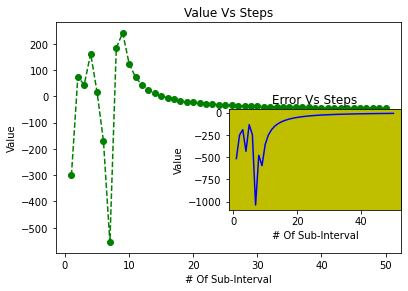

The Quadrature Method


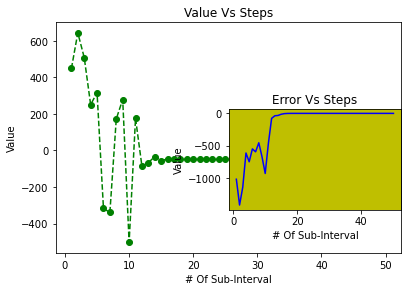

The Midpoint Method


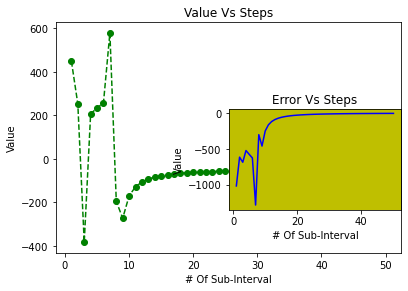

In [89]:
print("The Trapezoidal Method")
Plot(Trap,50,1,50)
print("The Quadrature Method")
Plot(Gauss,50,1,50)
print("The Midpoint Method")
Plot(Midpoint,50,1,50)